In [31]:
import ROOT as r
r.EnableImplicitMT()

import matplotlib.pyplot as plt

import hist
import mplhep as hep
hep.style.use(hep.style.CMS)

In [41]:
def makePlot(cut, column):
    df_bkg = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/bkg.root").Filter(cut).Filter("sample_type == \"ttbar\"").AsNumpy([column, "weight"])
    df_sig = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig.root").Filter(cut).AsNumpy([column, "weight"])
    
    h_sig = hist.Hist(hist.axis.Regular(100, 0.001, 800, name=column, label=column), storage=hist.storage.Weight())
    h_bkg = hist.Hist(hist.axis.Regular(100, 0.001, 800, name=column, label=column), storage=hist.storage.Weight())

    h_sig.fill(df_sig[column], weight=df_sig["weight"])
    h_bkg.fill(df_bkg[column], weight=df_bkg["weight"])

    fig, ax = plt.subplots()

    hep.histplot(h_sig, ax=ax, label="Signal", color='red', histtype='step', linewidth=2, density=True)
    hep.histplot(h_bkg, ax=ax, label="Background", color='blue', histtype='step', linewidth=2, density=True)

    ax.set_ylabel("Density")
    ax.set_xlabel(column)
    ax.legend()

    plt.savefig(f"/home/users/aaarora/public_html/vbs/plots/MT/{column}-ttbar.png")

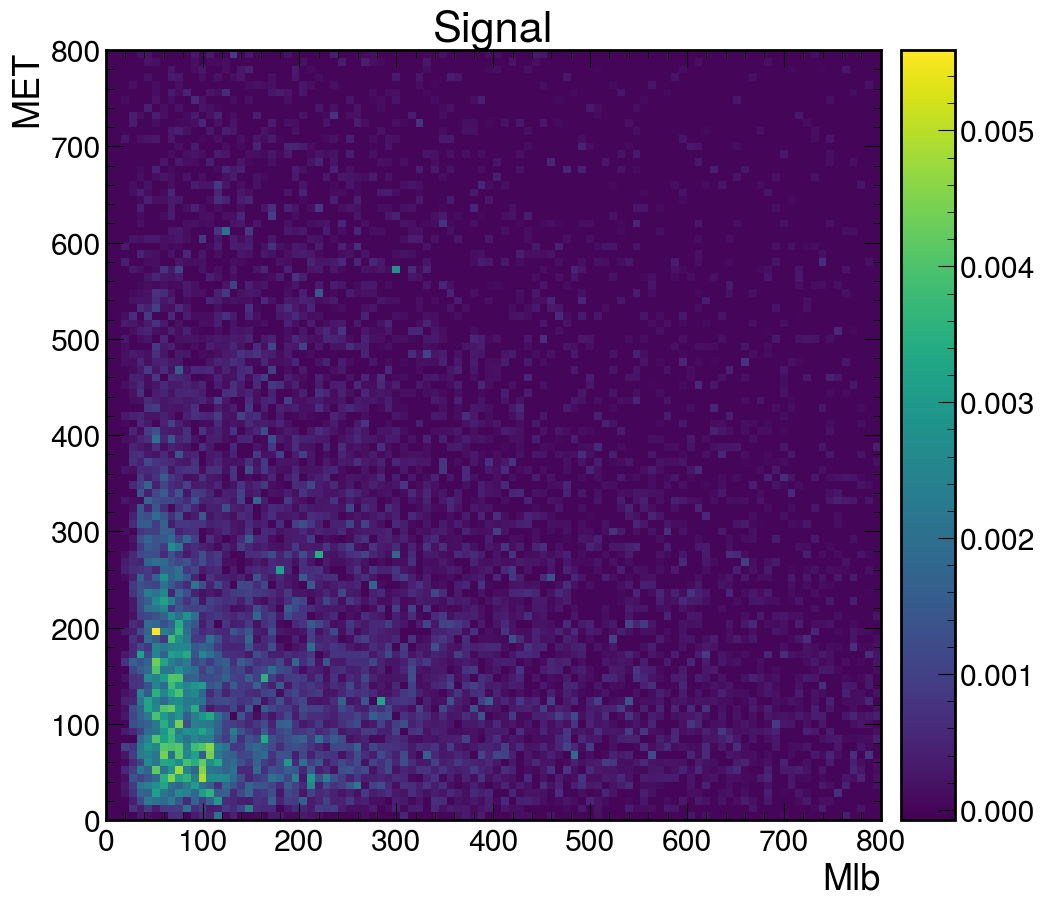

In [28]:
df_sig = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig.root").Filter("passCut6")

h_sig = df_sig.Histo2D(("h", "h", 100, 0, 800, 100, 0, 800), "Mlbminloose", "MET", "weight").GetValue()

fig, ax = plt.subplots()

hep.hist2dplot(h_sig, ax=ax)

ax.set_ylabel("MET")
ax.set_xlabel("Mlb")

ax.set_title("Signal")
plt.savefig(f"/home/users/aaarora/public_html/vbs/plots/MT/met-mlb-sig.png")

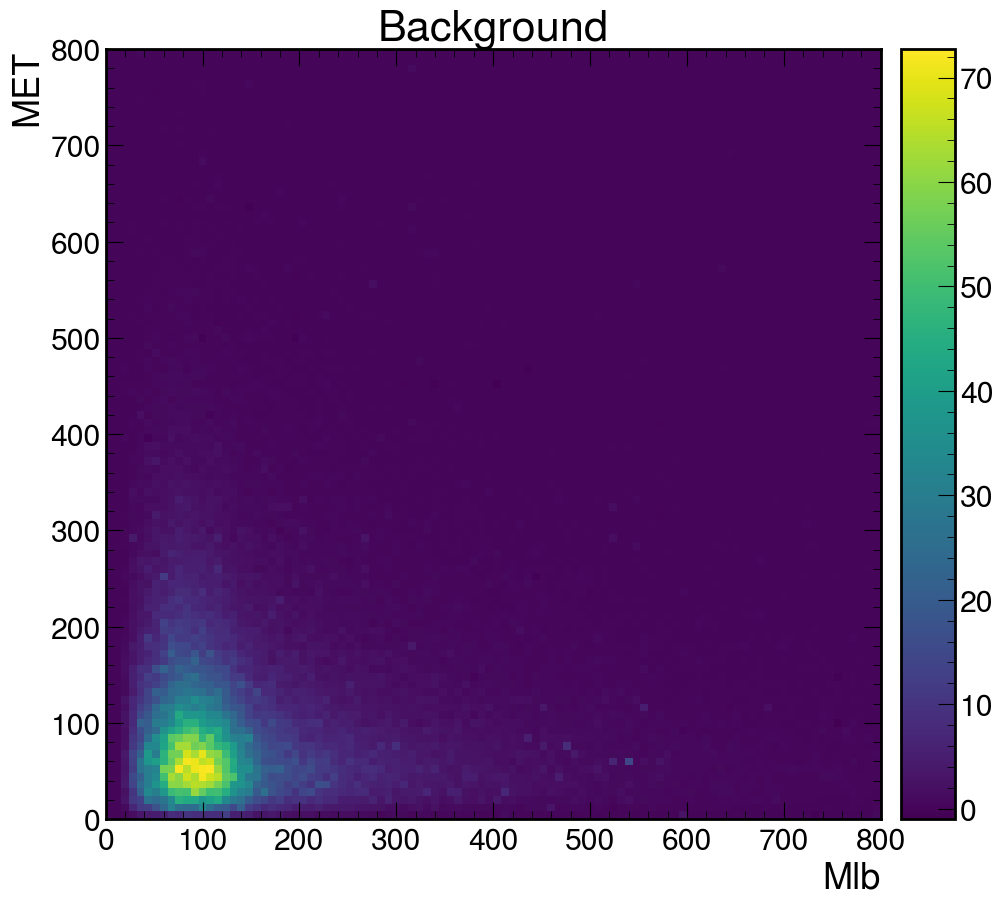

In [29]:
df_sig = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/bkg.root").Filter("passCut6")

h_sig = df_sig.Histo2D(("h", "h", 100, 0, 800, 100, 0, 800), "Mlbminloose", "MET", "weight").GetValue()

fig, ax = plt.subplots()

hep.hist2dplot(h_sig, ax=ax)

ax.set_ylabel("MET")
ax.set_xlabel("Mlb")

ax.set_title("Background")

plt.savefig(f"/home/users/aaarora/public_html/vbs/plots/MT/met-mlb-bkg.png")


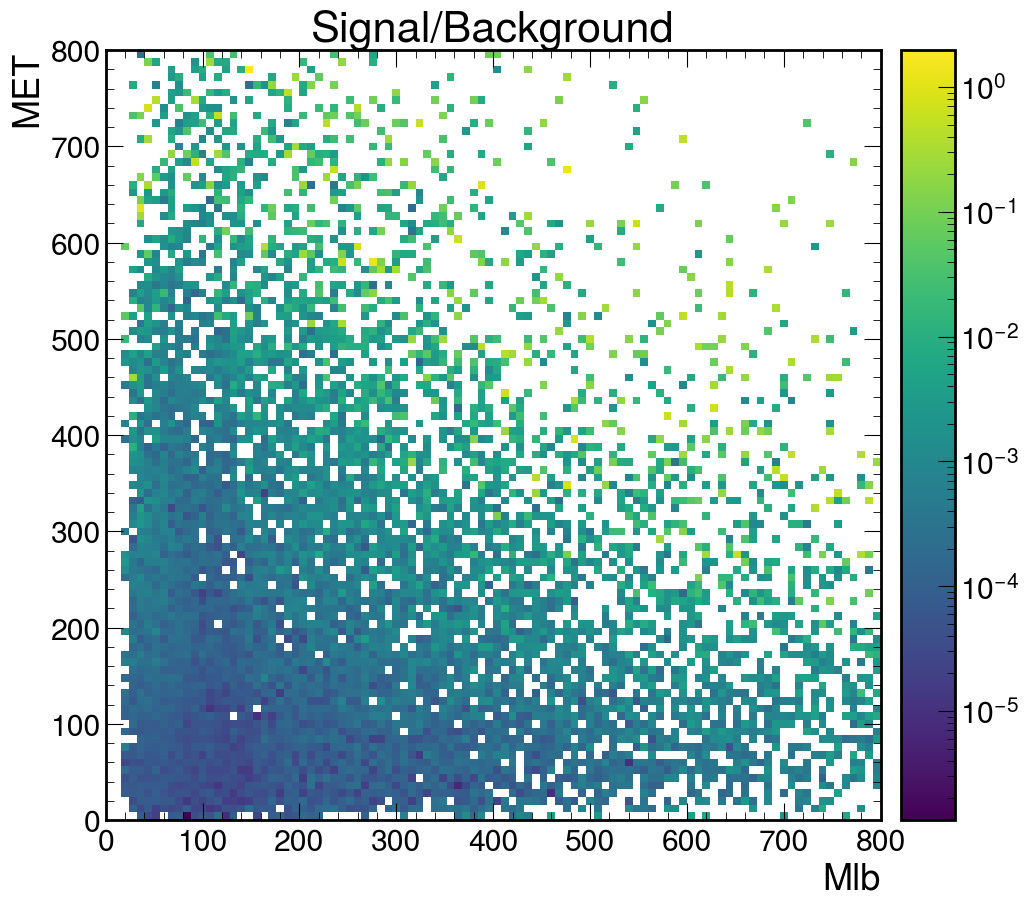

In [30]:
df_bkg = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/bkg.root").Filter("passCut6")
df_sig = r.RDataFrame("Events", "/data/userdata/aaarora/output/run2/sig.root").Filter("passCut6")

h_bkg = df_bkg.Histo2D(("h", "h", 100, 0, 800, 100, 0, 800), "Mlbminloose", "MET", "weight").GetValue()
h_sig = df_sig.Histo2D(("h", "h", 100, 0, 800, 100, 0, 800), "Mlbminloose", "MET", "weight").GetValue()

h = h_sig.Clone()
h.Divide(h_bkg)

fig, ax = plt.subplots()

hep.hist2dplot(h, ax=ax, norm="log")

ax.set_ylabel("MET")
ax.set_xlabel("Mlb")

ax.set_title("Signal/Background")

plt.savefig(f"/home/users/aaarora/public_html/vbs/plots/MT/met-mlb-ratio.png")


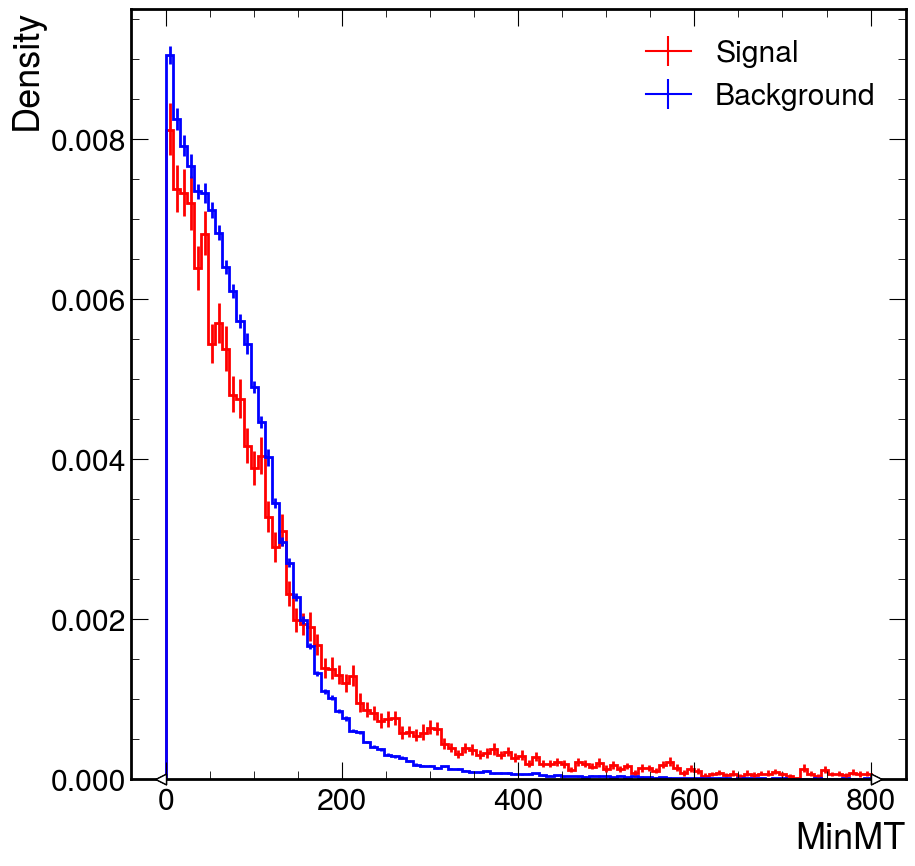

In [42]:
makePlot("passCut6", "MinMT")

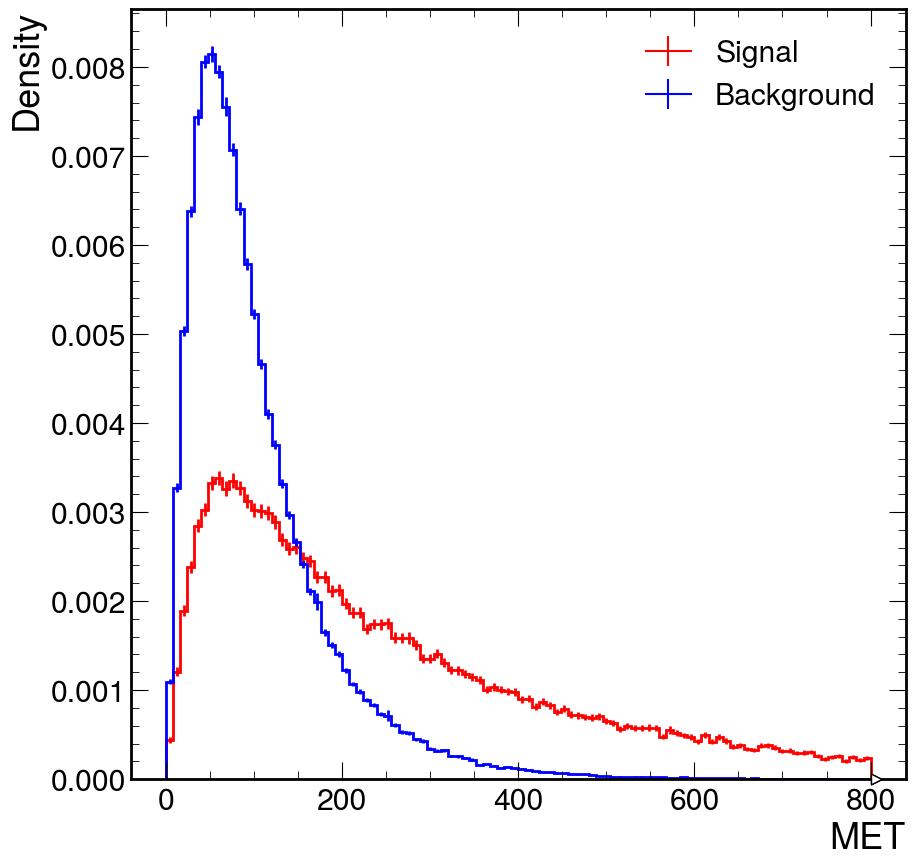

In [43]:
makePlot("passCut6", "MET")

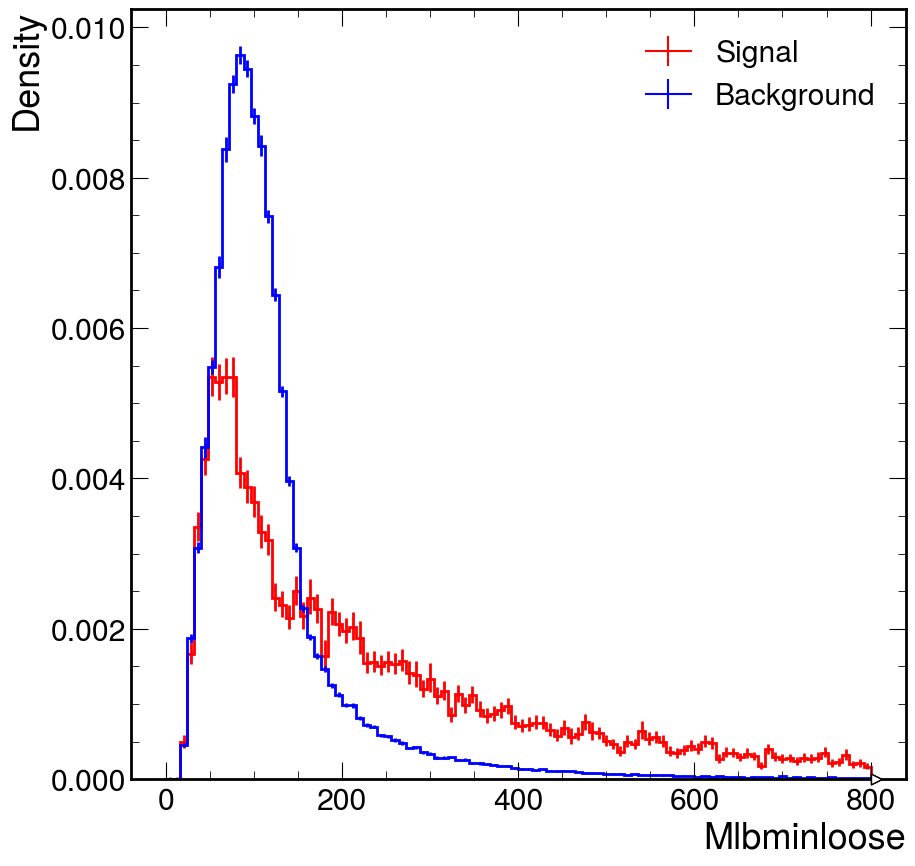

In [44]:
makePlot("passCut6", "Mlbminloose")